In [1]:
# Reload the modules to get the updated function
import importlib
from mcnpy.serpent.parse_sens import read_sensitivity_file
from mcnpy.sensitivities import sensitivity_processing
importlib.reload(sensitivity_processing)
from mcnpy.sensitivities.sensitivity_processing import create_sdf_from_serpent

In [2]:
# Load SERPENT sensitivity file
#serpent_sens = read_sensitivity_file("/share_snc/snc/JuanMonleon/PhD_Year1_Workspace/SERPENT2.2/PWRSphere/full_composition/56-scale/test/PWRSphere.sss2_sens0.m")
serpent_sens = read_sensitivity_file("/share_snc/snc/JuanMonleon/ASPIS88/SERPENT/test_ww_A7/ASPIS.sss2_sens0.m")

In [3]:
# Let's examine the structure of the SERPENT data
print("Available data keys:", list(serpent_sens.data.keys()))
print("\nFirst data set details:")
first_key = list(serpent_sens.data.keys())[0]
first_set = serpent_sens.data[first_key]
print(f"Key: {first_key}")
print(f"Type: {type(first_set)}")
print(f"Responses in this set: {[r.full_name for r in first_set.responses]}")
print(f"Response base names: {[r.base_name for r in first_set.responses]}")

# Check if there's an available_responses property
if hasattr(serpent_sens, 'available_responses'):
    print(f"\nAvailable responses: {serpent_sens.available_responses}")
else:
    print("\nNo available_responses property found")

Available data keys: ['sens_ratio']

First data set details:
Key: sens_ratio
Type: <class 'mcnpy.serpent.sens.SensitivitySet'>
Responses in this set: ['sens_ratio_BIN_0', 'sens_ratio_BIN_1', 'sens_ratio_BIN_2']
Response base names: ['sens_ratio', 'sens_ratio', 'sens_ratio']

Available responses: ['sens_ratio_BIN_0', 'sens_ratio_BIN_1', 'sens_ratio_BIN_2']


In [4]:
# Create SDF data from SERPENT results
sdf_data = create_sdf_from_serpent(
    serpent_file=serpent_sens,
    response_name="sens_ratio_BIN_2",  # or whatever response you're interested in
    title="SERPENT Sensitivity Analysis",
    response_values=(2.42730E-05, 0.00652)  # optional: set reference response values
)


Processing file 1/1 with response 'sens_ratio_BIN_2'...
Combined SDF contains 3 sensitivity profiles from 1 files


In [7]:
# Now you can use all SDF methods
sdf_data.group_inelastic_reactions(replace=True)
sdf_data.write_file("output_directory")

SDF file saved successfully: output_directory/SERPENT_Sensitivity_Analysis_sens_ratio_2_BIN_2.sdf


In [5]:
print(sdf_data)  # Nice formatted output

                SDF Data: SERPENT Sensitivity Analysis                
                    Energy range: sens_ratio_BIN_2                    

Response value:           2.427300e-05 ± 0.00% (rel)
Energy groups:            56
Energy structure:         SCALE56
Sensitivity profiles:     3
Unique nuclides:          1

Energy grid (preview):
    1.000000e-11, 4.000000e-09, 1.000000e-08, ... , 4.304000e+00, 6.434000e+00, 2.000000e+01

Nuclides and reactions (with access indices):

  Fe-56:
    (z,z0)P1 (MT=4001)             access with .data[0]
    (z,z0)P2 (MT=4002)             access with .data[1]
    (z,z0)P3 (MT=4003)             access with .data[2]


Available methods:
- .write_file() - Write SDF data to a file
- .group_inelastic_reactions() - Group MT 51-91 into MT 4



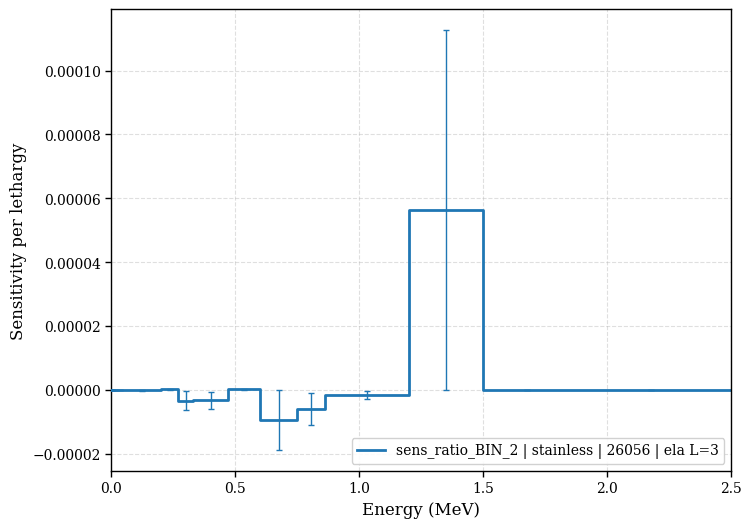

<Axes: xlabel='Energy (MeV)', ylabel='Sensitivity per lethargy'>

In [13]:
serpent_sens.plot_energy_sensitivity(["sens_ratio_BIN_2"], materials=0, nuclides=0,
                           leg=[3], errorbars=True, 
                           style='default', energy_range=(0, 2.5))